# Estatisticas e visualizações

In [265]:
import pandas as pd

In [266]:
df = pd.read_csv('pre_processado.csv')
df.head()

,city,state,country,shape,duration_m,comments,latitude,longitude,date,time
0,san marcos,tx,us,cylinder,45.000000,This event took place in early fall around 194...,29.883056,-97.941111,1949-10-10,20:30:00
1,edna,tx,us,circle,0.333333,My older brother and twin sister were leaving ...,28.978333,-96.645833,1956-10-10,21:00:00
2,kaneohe,hi,us,light,15.000000,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,1960-10-10,20:00:00
3,bristol,tn,us,sphere,5.000000,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,1961-10-10,19:00:00
4,norwalk,ct,us,disk,20.000000,A bright orange color changing to reddish colo...,41.117500,-73.408333,1965-10-10,23:45:00


## Países

In [267]:
df_c = df[['country']]
df_c = df_c.groupby(['country'])['country'].count().to_frame()
df_c = df_c.rename(columns={'country': 'qtd_avistamento_por_pais'})
df_c

,qtd_avistamento_por_pais
country,
au,10
ca,2942
gb,11
us,63553


In [268]:
maxc_qtd = list(df_c.max())
maxc_name = list(df_c.idxmax())

print(f'A quantidade máxima de avistamentos por países foi de {maxc_qtd} no país {maxc_name}')

A quantidade máxima de avistamentos por países foi de [63553] no país ['us']


## Estados

In [269]:
df_s = df.loc[df['country'] == maxc_name[0]]
df_s = df_s.groupby(['state'])['state'].count().to_frame()
df_s = df_s.rename(columns={'state': 'qtd_avistamento_por_state'})
df_s.head()

,qtd_avistamento_por_state
state,
ak,311
al,629
ar,578
az,2362
ca,8683


In [270]:
maxs_qtd = list(df_s.max())
maxs_name = list(df_s.idxmax())

print(f'A quantidade máxima de avistamentos por estados foi de {maxs_qtd} no estado {maxs_name}')

A quantidade máxima de avistamentos por estados foi de [8683] no estado ['ca']


## Cidades

In [271]:
df_ci = df.loc[(df['country'] == maxc_name[0]) & (df['state'] == maxs_name[0])]
df_ci = df_ci.groupby(['city'])['city'].count().to_frame()
df_ci = df_ci.rename(columns={'city': 'qtd_avistamento_por_city'})
df_ci.head()

,qtd_avistamento_por_city
city,
acampo,1
acton,5
acton (approx.),1
adelanto,4
agoura hills,6


In [272]:
maxci_qtd = list(df_ci.max())
maxci_name = list(df_ci.idxmax())

print(f'A quantidade máxima de avistamentos por cidades foi de {maxci_qtd} na cidade {maxci_name}')

A quantidade máxima de avistamentos por cidades foi de [347] na cidade ['los angeles']


## Date

In [282]:
df_date = df.loc[(df['country'] == maxc_name[0]) & (df['state'] == maxs_name[0]) & (df['city'] == maxci_name[0])]
df_date

,city,state,country,shape,duration_m,comments,latitude,longitude,date,time
119,los angeles,ca,us,oval,0.166667,Egg UFO over Hollywood Hills and LAX in LOS AN...,34.052222,-118.242778,2005-10-10,14:45:00
259,los angeles,ca,us,light,5.000000,It was a large bright light sitting stationary...,34.052222,-118.242778,1999-10-11,04:30:00
296,los angeles,ca,us,rectangle,0.333333,Large&#44 rectangular&#44 pale green-blue obje...,34.052222,-118.242778,2004-10-11,02:37:00
341,los angeles,ca,us,triangle,0.500000,Large Triangle sighted over L.A,34.052222,-118.242778,2008-10-11,22:30:00
659,los angeles,ca,us,formation,25.000000,4 UFOs in a big arrowlike formation at high al...,34.052222,-118.242778,2005-10-01,17:00:00
...,...,...,...,...,...,...,...,...,...,...
65240,los angeles,ca,us,oval,15.000000,White oval object traveling overhead northeast...,34.052222,-118.242778,2012-09-30,15:50:00
65366,los angeles,ca,us,oval,0.083333,UFO with intense lights seen over LA on Sept. ...,34.052222,-118.242778,2009-09-03,23:30:00
66030,los angeles,ca,us,light,2.000000,Orange light climbs 3 minutes straight up into...,34.052222,-118.242778,2005-09-07,01:56:00
66224,los angeles,ca,us,light,0.500000,Two steady&#44 white lights heading northeast ...,34.052222,-118.242778,2009-09-08,19:48:00


In [283]:
df_date = df_date.groupby(['date'])['date'].count().to_frame()
df_date = df_date.rename(columns={'date': 'qtd_avistamento_por_data'})
df_date

,qtd_avistamento_por_data
date,
1951-02-15,1
1953-04-15,1
1954-07-01,1
1957-03-15,2
1959-12-20,1
...,...
2013-12-26,1
2014-01-09,1
2014-02-23,1


Text(0, 0.5, 'QUANTIDADE')

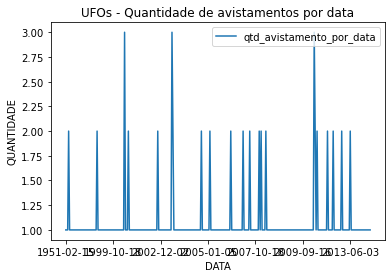

In [284]:
fig = df_date.plot(title='UFOs - Quantidade de avistamentos por data')
fig.set_xlabel("DATA")
fig.set_ylabel("QUANTIDADE")